<a href="https://colab.research.google.com/github/Ciro125/Alura/blob/main/Deep_Learning_Parte_2_(Como_a_rede_aprende).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports


In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

Carregando o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

Exploração de dados

In [3]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

Exibição dos dados

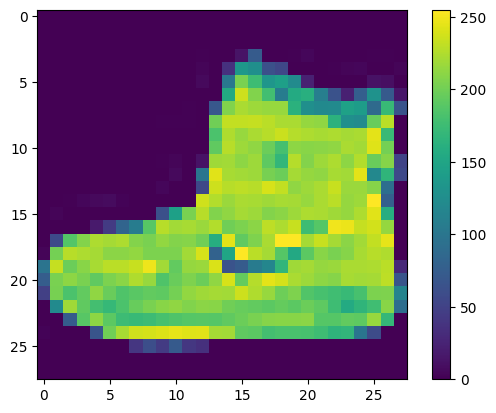

In [4]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

Normalizando as imagens

In [5]:
imagens_treino = imagens_treino/float(255)

Criando, compilando, treinando e normalizando o modelo

In [6]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

adam = keras.optimizers.Adam(lr=0.002)

'''lr
learning rate
taxa de aprendizado'''

parando_cedo = [keras.callbacks.EarlyStopping(monitor='val_loss'),
                keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',
                                               monitor='val_loss', save_best_only=True)]

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, 
                       batch_size = 480,
                       epochs=5, validation_split=0.2,
                       callbacks=parando_cedo)

Epoch 1/5
100/100 [==============================] - 3s 20ms/step - loss: 0.7249 - accuracy: 0.7503 - val_loss: 0.4856 - val_accuracy: 0.8307
Epoch 2/5
100/100 [==============================] - 2s 18ms/step - loss: 0.4748 - accuracy: 0.8359 - val_loss: 0.4249 - val_accuracy: 0.8533
Epoch 3/5
100/100 [==============================] - 3s 28ms/step - loss: 0.4204 - accuracy: 0.8543 - val_loss: 0.4033 - val_accuracy: 0.8571
Epoch 4/5
100/100 [==============================] - 2s 16ms/step - loss: 0.3902 - accuracy: 0.8629 - val_loss: 0.3756 - val_accuracy: 0.8683
Epoch 5/5
100/100 [==============================] - 3s 26ms/step - loss: 0.3662 - accuracy: 0.8701 - val_loss: 0.3623 - val_accuracy: 0.8727


Sumário do modelo

In [7]:
sumario_do_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Pesos da primeira camada Dense

In [8]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 0.00448033,  0.03346012,  0.03288686, ...,  0.00219242,
        -0.04227633,  0.00040954],
       [ 0.00910156,  0.05850891,  0.0117556 , ..., -0.11346614,
        -0.00745817,  0.01302298],
       [-0.0063012 ,  0.02979264,  0.01773334, ..., -0.07832134,
        -0.00177867, -0.04195175],
       ...,
       [-0.02912384,  0.07075467,  0.07739331, ...,  0.07053123,
        -0.04213543, -0.0479309 ],
       [ 0.05752474,  0.02230978,  0.09655888, ..., -0.06612121,
        -0.08985592, -0.08907799],
       [-0.03295642, -0.04723606, -0.01729603, ...,  0.02453082,
        -0.0598814 , -0.03715982]], dtype=float32)

Vieses da primeira camada Dense

In [9]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

In [10]:
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784, 256))

pesos_camada_dense_aleatorios = np.random.rand(784, 256)

'''
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense]
)
'''

modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense]
)

modelo.layers[1].get_weights()

[array([[0.2184697 , 0.956784  , 0.34648412, ..., 0.7417081 , 0.89082986,
         0.19863513],
        [0.47743863, 0.86903805, 0.3225358 , ..., 0.42372268, 0.3940159 ,
         0.01707933],
        [0.063375  , 0.21316239, 0.17071386, ..., 0.3590323 , 0.17591147,
         0.7627111 ],
        ...,
        [0.7618335 , 0.4683837 , 0.14951861, ..., 0.78405094, 0.8192923 ,
         0.99698216],
        [0.39714795, 0.21349241, 0.3283016 , ..., 0.81287855, 0.7292579 ,
         0.1799777 ],
        [0.66945195, 0.53107023, 0.72541875, ..., 0.57798624, 0.12885107,
         0.22593851]], dtype=float32),
 array([ 9.76824537e-02,  8.18417668e-02,  1.08958229e-01,  1.36311010e-01,
         5.26790433e-02, -1.46001456e-02, -6.30776286e-02,  8.61254334e-02,
         3.24927270e-02,  1.48378626e-01,  1.07793733e-01,  1.07718281e-01,
         1.72968179e-01,  4.71035577e-02,  5.08878613e-03,  6.35983841e-03,
         1.33592248e-01, -1.78581849e-02, -7.26560503e-02,  1.31036580e-01,
         9.329

In [11]:
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 67.1412 - accuracy: 0.4148 - val_loss: 11.4520 - val_accuracy: 0.7066
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 17.5139 - accuracy: 0.6271 - val_loss: 7.1304 - val_accuracy: 0.7188
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 7.2485 - accuracy: 0.6793 - val_loss: 3.1367 - val_accuracy: 0.7662
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 3.5884 - accuracy: 0.7070 - val_loss: 1.6797 - val_accuracy: 0.7881
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 1.8916 - accuracy: 0.7418 - val_loss: 1.0293 - val_accuracy: 0.8061


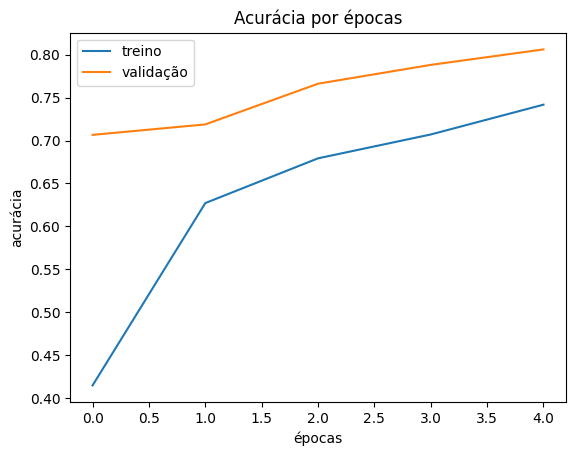

In [12]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


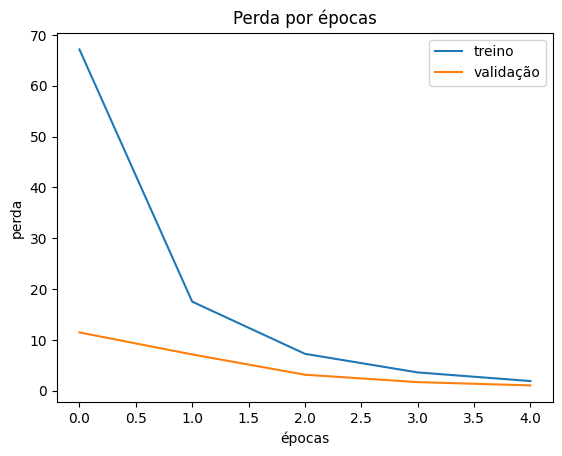

In [13]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [14]:
modelo.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 

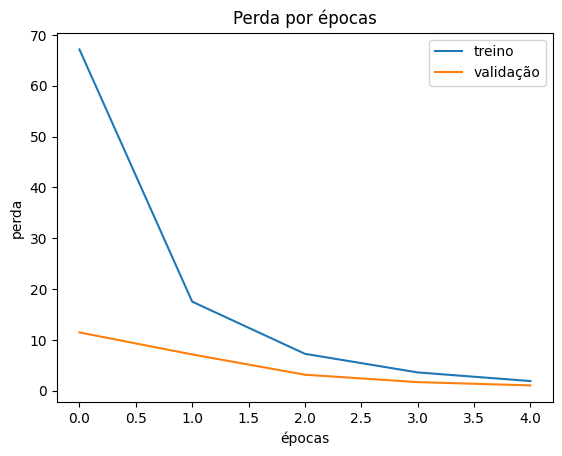

In [15]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [16]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape
     

(256,)

In [17]:
vieses_camada_dense_zerados = np.zeros((256,))
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zerados]
)

Salvando e carregando o modelo treinado

In [20]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Visualizando as acurácias de treino e validação por época

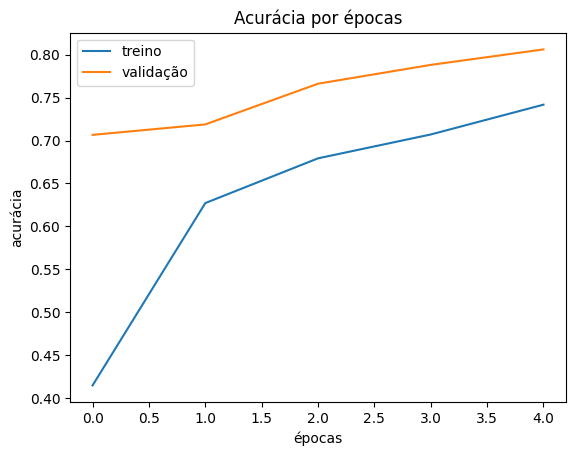

In [21]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

Visualizando as perdas de treino e validação por época

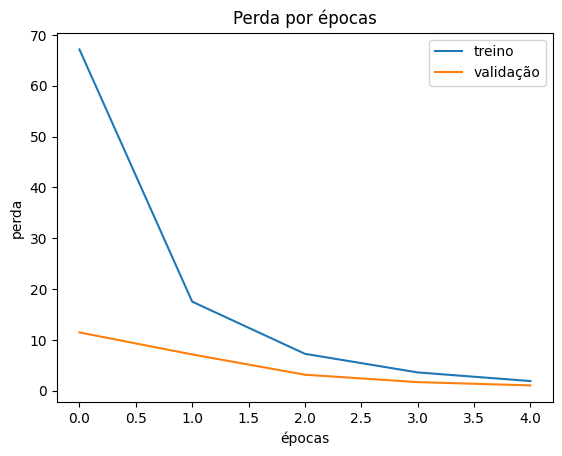

In [22]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo e o modelo salvo

In [23]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

313/313 [==============================] - 1s 3ms/step
resultado teste: 3
número da imagem de teste: 2
313/313 [==============================] - 1s 3ms/step
resultado teste modelo salvo: 3
número da imagem de teste: 2


Avaliando o modelo

In [24]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 15961.9199 - accuracy: 0.0977
Perda do teste: 15961.919921875
Acurácia do teste: 0.09769999980926514
